In [ ]:
!git clone https://github.com/Earnings-Call-Dataset/MAEC-A-Multimodal-Aligned-Earnings-Conference-Call-Dataset-for-Financial-Risk-Prediction.git

In [ ]:
!mv MAEC-A-Multimodal-Aligned-Earnings-Conference-Call-Dataset-for-Financial-Risk-Prediction MAEC

In [ ]:
records = os.listdir('MAEC/MAEC_Dataset')

In [ ]:
records[0]

'20170224_SJI'

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
data = []

for record in records:
  d = {}
  d['folder'] = record
  date, code = record.split('_')
  date = date[:4] + '-' + date[4:6] + '-' + date[6:]
  d['code'] = code
  d['date'] = date
  data.append(d)

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df

,folder,code,date
0,20170224_SJI,SJI,2017-02-24
1,20170224_SWN,SWN,2017-02-24
2,20170224_TDS,TDS,2017-02-24
3,20170224_TPRE,TPRE,2017-02-24
4,20170227_AES,AES,2017-02-27
...,...,...,...
3438,20150806_AGN,AGN,2015-08-06
3439,20150806_ALEX,ALEX,2015-08-06
3440,20150806_ANDV,ANDV,2015-08-06
3441,20150806_CNK,CNK,2015-08-06


In [ ]:
# Function to fetch the stock price with date adjustment
def get_adjusted_price(ticker, start_date):
    current_date = start_date
    max_tries = 10
    while True:
        if max_tries == 0: return None
        try:
            price_data = yf.download(ticker, start=current_date, end=current_date + timedelta(days=1), progress=False)
        except:
            return None
        if not price_data.empty:
            return price_data['Close'].iloc[0]
        current_date += timedelta(days=1)
        max_tries -= 1

# Function to fetch stock prices with forward search if necessary
def get_stock_prices(ticker, date):
    # Get the adjusted price for the original date
    price_on_date = get_adjusted_price(ticker, date)

    # Get the adjusted price for the date one month later
    date_after_month = date + timedelta(days=30)
    price_after_month = get_adjusted_price(ticker, date_after_month)

    return price_on_date, price_after_month



In [ ]:
# Apply the function to each row
#df[['Price on Date', 'Price After Month']] = df.apply(
#    lambda row: get_stock_prices(row['code'], row['date']), axis=1, result_type='expand'
#)

# Display the dataframe with the new columns
#print(df)

In [ ]:
#import logging
#logger = logging.getLogger('yfinance')
#logger.disabled = True
#logger.propagate = False

In [ ]:
import tqdm
import json

In [ ]:
#prices = []
#for i in tqdm.tqdm(range(df.shape[0])):
#  row = df.iloc[i]
#  prices.append(get_stock_prices(row['code'], row['date']))

#with open('prices.json', 'w') as f:
#  json.dump(prices, f)

In [ ]:
#prices = json.load(open('prices.json'))

In [ ]:
#first_price, second_price = zip(*prices)

In [ ]:
#df['first_price'] = first_price
#df['second_price'] = second_price

In [ ]:
#df = df.dropna()

In [ ]:
#df['label'] = (df['second_price'] >= df['first_price']*1.05)

In [ ]:
#df['text'] = df['folder'].apply(lambda folder_name: open(f'MAEC/MAEC_Dataset/{folder_name}/text.txt').read())

#!ls MAEC/MAEC_Dataset/20151021_ELY/text.txt

In [ ]:
#df.to_csv('dataset.csv')

In [ ]:
#df.to_pickle('dataset.pkl')

In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [ ]:
df['label'] = df['label'].astype(int)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract texts and labels
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()


In [ ]:
sum(train_labels)/len(train_labels)

0.28735632183908044

In [ ]:
import numpy as np

In [ ]:
random_labels = np.random.randint(0,2, len(test_labels))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_labels, random_labels)

0.5120772946859904

In [ ]:
!pip install datasets

In [ ]:
from transformers import AutoTokenizer, BertTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

# Load a pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Convert to PyTorch tensors
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': train_labels})
test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'labels': test_labels})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Assuming `train_dataset` has an attribute `labels` containing all the labels
labels = train_dataset['labels']  # Replace with the actual way to access labels in your dataset

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Custom compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {
        'accuracy': accuracy,
        'f1': f1,
    }

# Load a pre-trained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased', num_labels=2)

# Modify the model to include class weights
model.classifier = torch.nn.Linear(model.config.hidden_size, model.config.num_labels)
model.criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=30,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    learning_rate=3e-5,
    evaluation_strategy="steps",
    save_steps=1000,
    save_total_limit=2,
    gradient_accumulation_steps=1,
    max_grad_norm=1.0,
)

# Define a custom training loop to include the class-weighted loss
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = model.criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Fine-tune the model
# trainer.train()


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train('results/checkpoint-312')

You are resuming training from a checkpoint trained with 4.42.4 of Transformers but your current version is 4.44.2. This is not recommended and could yield to errors or unwanted behaviors.
/usr/local/lib/python3.10/dist-packages/transformers/trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where yo

Step,Training Loss,Validation Loss


TrainOutput(global_step=312, training_loss=0.0, metrics={'train_runtime': 0.0524, 'train_samples_per_second': 94649.26, 'train_steps_per_second': 5954.944, 'total_flos': 656905829935104.0, 'train_loss': 0.0, 'epoch': 3.0})

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Get predictions
predictions = trainer.predict(test_dataset)
pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

accuracy, f1


(0.606280193236715, 0.28193832599118945)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
roc_auc_score(test_labels,torch.tensor(predictions.predictions).softmax(-1)[:,1])

0.4807038652428937

In [ ]:
import torch
import torch.nn.functional as F
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import tqdm
def calculate_token_importance(text, model, tokenizer, correct_class):
    model = model.cpu()
    # Tokenize input
    tokens = tokenizer.tokenize(text)
    inputs = tokenizer([text], return_tensors='pt', truncation=True, padding=True, max_length=512)
    input_ids = inputs['input_ids']

    # Get baseline output
    with torch.no_grad():
        outputs = model(**inputs)
        baseline_probs = F.softmax(outputs.logits, dim=-1)
        baseline_prob = baseline_probs[0, correct_class].item()
    print(baseline_prob)
    # Initialize importance scores
    importance_scores = []

    # Sequentially mask each token
    for i in tqdm.tqdm(range(input_ids.size(1))):
        # Create a copy of the input_ids and mask the i-th token
        masked_input_ids = input_ids.clone()
        masked_input_ids[0, i] = tokenizer.mask_token_id

        # Get the output for the masked input
        with torch.no_grad():
            masked_outputs = model(input_ids=masked_input_ids)
            masked_probs = F.softmax(masked_outputs.logits, dim=-1)
            masked_prob = masked_probs[0, correct_class].item()

        # Calculate importance score
        importance_score = baseline_prob - masked_prob
        importance_scores.append((i, importance_score))

    # Sort tokens by importance score (descending order)
    sorted_importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)

    # Get tokens back from ids for interpretation
    important_tokens = [(tokenizer.convert_ids_to_tokens([input_ids[0, idx]])[0], score) for idx, score in sorted_importance_scores]
    important_tokens = [(t, s) for t, s in important_tokens  if t not in ['[CLS]', '[SEP]']]
    return important_tokens, tokens, [x[1] for x in importance_scores[1:-1]]



In [ ]:
important_tokens, tokens, importance_scores = calculate_token_importance("""It hasn't changed our product, it hasn't changed our value proposition and we continue to push forward, and I would say quite successfully.
By the way, I say that, not saying the other strategy is bad.
It's more our segment of the business, which is online travel, largely independent travelers, people who leverage the Internet, has a nice tailwind behind it, and we're making sure that we do our best to capture as much of that as possible.""",model, tokenizer, 1)

0.9233225584030151


100%|██████████| 101/101 [00:34<00:00,  2.94it/s]


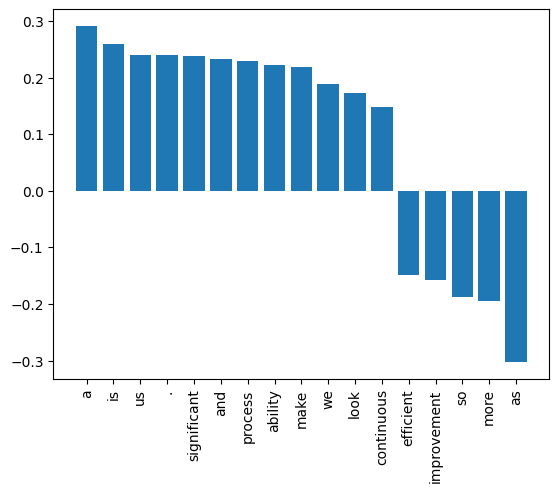

In [ ]:
import matplotlib.pyplot as plt

abs_scores = [x[1] for x in important_tokens]
abs_scores = np.abs(abs_scores)
p = np.percentile(abs_scores, 75)

plt.bar([x[0] for x in important_tokens if abs(x[1])>p], [x[1] for x in important_tokens if abs(x[1])>p])
plt.xticks(rotation=90)
plt.show()

In [ ]:
tokens

['we',
 'have',
 'driven',
 'significant',
 'process',
 'improvement',
 'to',
 'essentially',
 'make',
 'it',
 'as',
 'efficient',
 'as',
 'one',
 'can',
 'make',
 'it',
 'and',
 'that',
 'is',
 'a',
 'continuous',
 'process',
 'for',
 'us',
 '.',
 'so',
 ',',
 'when',
 'i',
 'think',
 'about',
 'even',
 'the',
 'capital',
 'allocation',
 'per',
 'quarter',
 ',',
 'we',
 'carefully',
 'look',
 'at',
 'what',
 'is',
 'our',
 'current',
 'utilization',
 'forecast',
 'and',
 'what',
 'our',
 'demand',
 'forecast',
 'is',
 '.',
 'and',
 'we',
 'now',
 'have',
 'the',
 'ability',
 'to',
 'be',
 'much',
 'more',
 'dynamic',
 '.']

In [ ]:
importance_scores

[0.18843960762023926,
 0.011326879262924194,
 0.06402963399887085,
 0.23798537999391556,
 0.06639954447746277,
 -0.15816020965576172,
 -0.10403475165367126,
 -0.10399410128593445,
 0.21954725682735443,
 -0.03176301717758179,
 0.07048839330673218,
 -0.1487959623336792,
 -0.303022563457489,
 0.008105874061584473,
 -0.08654570579528809,
 0.07445147633552551,
 -0.017491549253463745,
 0.2325875610113144,
 0.1339121162891388,
 0.25874063372612,
 0.2907492145895958,
 0.14875590801239014,
 0.23006413877010345,
 -0.09256118535995483,
 0.24001171439886093,
 0.23955148458480835,
 -0.1878279447555542,
 -0.13523578643798828,
 0.10906575620174408,
 -0.029411792755126953,
 0.050002068281173706,
 0.09173578023910522,
 0.005346029996871948,
 0.033036887645721436,
 0.06773567199707031,
 -0.016910433769226074,
 -0.10455244779586792,
 -0.005392491817474365,
 0.038146644830703735,
 0.03811553120613098,
 0.12877820432186127,
 0.1731451153755188,
 0.07527312636375427,
 -0.0060322582721710205,
 -0.02574089169

In [ ]:
tokens

['we',
 'have',
 'driven',
 'significant',
 'process',
 'improvement',
 'to',
 'essentially',
 'make',
 'it',
 'as',
 'efficient',
 'as',
 'one',
 'can',
 'make',
 'it',
 'and',
 'that',
 'is',
 'a',
 'continuous',
 'process',
 'for',
 'us',
 '.',
 'so',
 ',',
 'when',
 'i',
 'think',
 'about',
 'even',
 'the',
 'capital',
 'allocation',
 'per',
 'quarter',
 ',',
 'we',
 'carefully',
 'look',
 'at',
 'what',
 'is',
 'our',
 'current',
 'utilization',
 'forecast',
 'and',
 'what',
 'our',
 'demand',
 'forecast',
 'is',
 '.',
 'and',
 'we',
 'now',
 'have',
 'the',
 'ability',
 'to',
 'be',
 'much',
 'more',
 'dynamic',
 '.']

In [ ]:
from IPython.core.display import display, HTML

def highlight_text(tokens, scores):
    scores = np.array(scores)
    scores /= np.abs(scores).max()
    html_text = ""
    for token, value in zip(tokens, scores):
        if value > 0:
          color = 'rgba(255,0,0,{:.2f})'.format(value)
        else:
          color = 'rgba(0,0,255,{:.2f})'.format(abs(value))
        html_text += '<span style="background-color: {}">{}</span> '.format(color, token)
    display(HTML(html_text))

highlight_text(tokens, importance_scores)


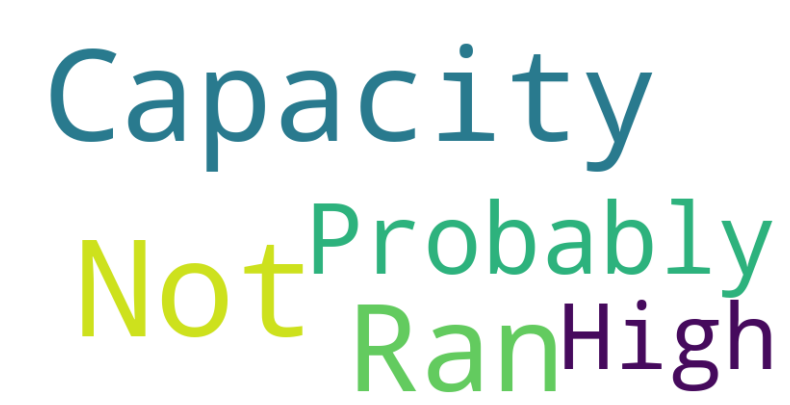

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example list of words with their corresponding scores
words_with_scores = {
    'Investment': 100,
    'Innovation': 80,
    'Continue': 90,
    'Forward': 60,
    'Growth': 70,
    'Efficient': 50,
}

words_with_scores = {
    'Not': 100,
    'Ran': 80,
    'Capacity': 90,
    'High': 60,
    'Probably': 70,
}


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_with_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example list of words with their corresponding scores
words_with_scores = {
    'data': 100,
    'science': 80,
    'python': 90,
    'machine': 60,
    'learning': 70,
    'model': 50,
    'analysis': 40,
    'statistics': 65,
    'visualization': 75,
    'algorithm': 55
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_with_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()